### This file is for Testing the code line by line, for understanding purposes


In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

In [14]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=["date"], index_col="date")
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [15]:
# Clean data
df = df[
    (df["value"] >= df["value"].quantile(0.025))
    & (df["value"] <= df["value"].quantile(0.975))
]
df.count(numeric_only=True)

value    1238
dtype: int64

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views From 5/2016 To 12/2019')

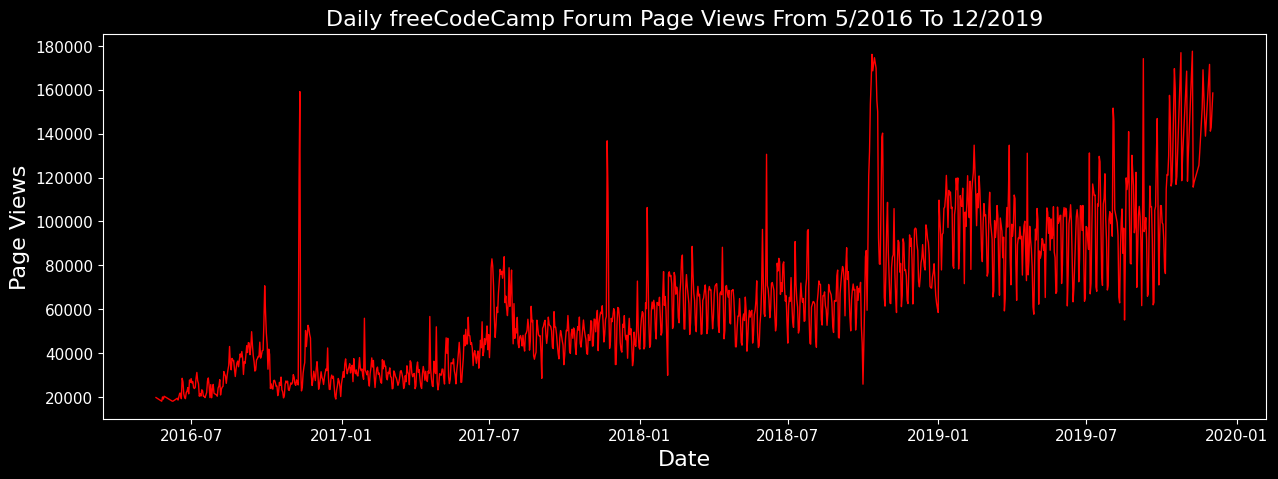

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.style.use("dark_background")
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Page Views", fontsize=16)
ax.plot(
    df.index,
    df["value"],
    "r",
    linewidth=1,
)
ax.set_title("Daily freeCodeCamp Forum Page Views From 5/2016 To 12/2019", fontsize=16)

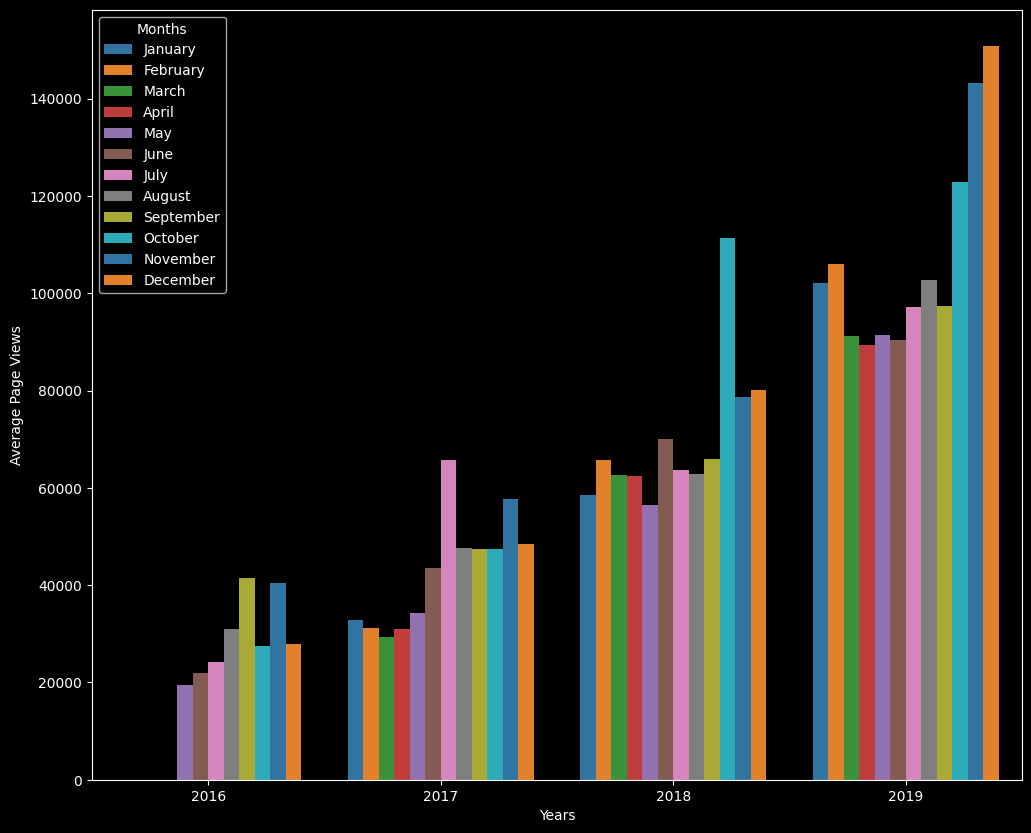

In [ ]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df_bar["Month"] = df_bar.index.month_name()
df_bar["Year"] = df_bar.index.year
df_bar = df_bar.groupby(["Year", "Month"])["value"].mean().reset_index()
df_bar = df_bar.rename(columns={"value": "Average Page Views"})

# Draw bar plot
fig, ax = plt.subplots(figsize=(12, 10))
months = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]
sns.barplot(
    data=df_bar,
    x="Year",
    y="Average Page Views",
    hue="Month",
    hue_order=months,
    palette="tab10",
)
ax.set_ylabel("Average Page Views")
ax.set_xlabel("Years")
ax.legend(title="Months")

In [18]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box["Year"] = [d.year for d in df_box.date]
df_box["Month"] = [d.strftime("%b") for d in df_box.date]
df_box.rename(columns={"value": "Page Views"}, inplace=True)
df_box

,date,Page Views,Year,Month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

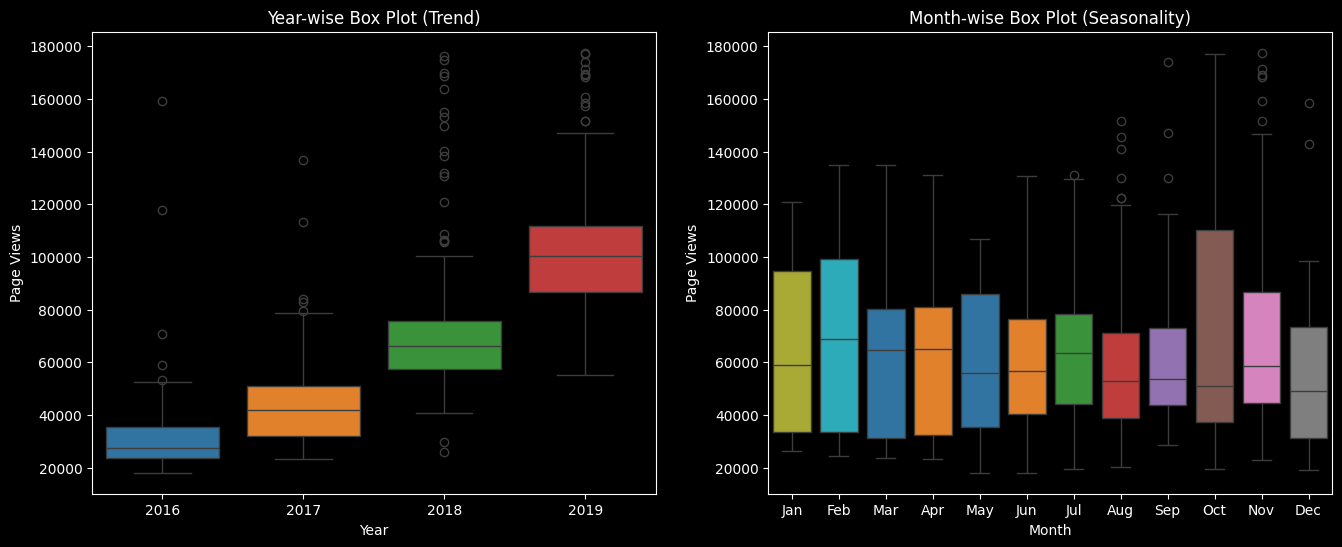

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
months = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]


sns.boxplot(
    data=df_box,
    x="Year",
    y="Page Views",
    ax=ax[0],
    hue="Year",
    palette="tab10",
    legend=False,
)
ax[0].set_title("Year-wise Box Plot (Trend)")
sns.boxplot(
    data=df_box,
    x="Month",
    y="Page Views",
    ax=ax[1],
    hue="Month",
    palette="tab10",
    order=months,
)
ax[1].set_title("Month-wise Box Plot (Seasonality)")